In [2]:
import shap
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load model and data
model = joblib.load("../models/logreg_bert_model.pkl")
X_test_bert = np.load("../data/processed/X_test_bert.npy")
X_train_bert = np.load("../data/processed/X_train_bert.npy")

# Sample text data for display
df = pd.read_csv("../data/processed/liar_cleaned.csv")
X_text = df["cleaned_text"]
_, X_text_test = train_test_split(X_text, test_size=0.2, random_state=42)


c:\Users\nishi\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


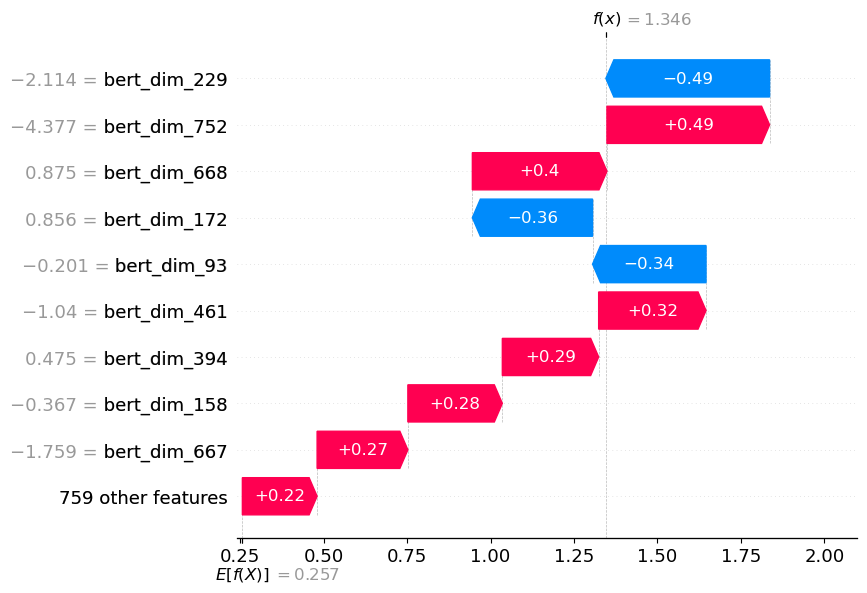

In [ ]:
explainer = shap.LinearExplainer(model, X_train_bert[:100], feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_bert[:100])

# Create Explanation object manually for one sample
explanation = shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test_bert[0],
    feature_names=[f"bert_dim_{i}" for i in range(X_test_bert.shape[1])]
)

# Plot waterfall for one prediction
shap.plots.waterfall(explanation)

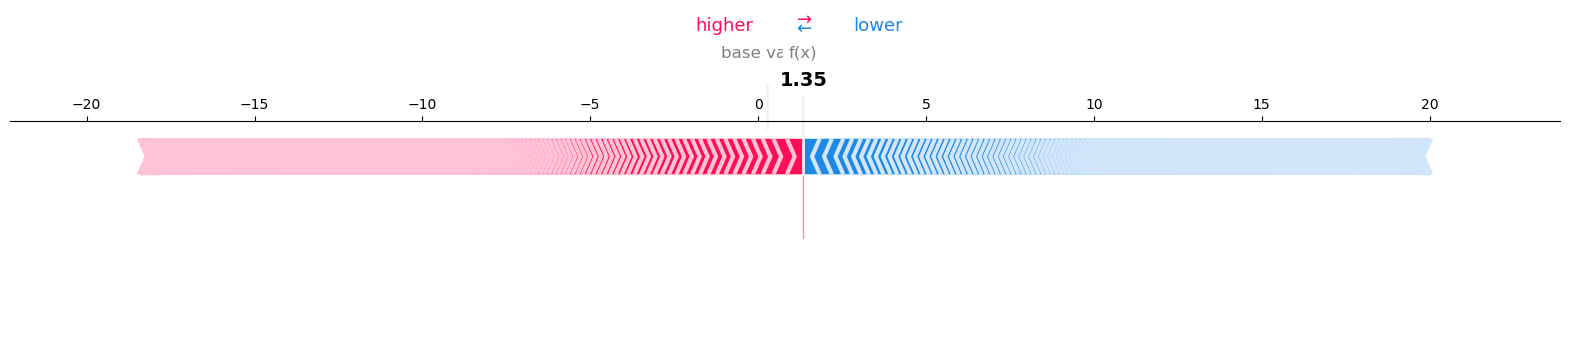

In [5]:
shap.force_plot(explainer.expected_value, shap_values[0], matplotlib=True)


In [6]:
print("📰 Example Text:")
print(X_text_test.iloc[0])

print("\n🧠 Predicted Label:", model.predict([X_test_bert[0]])[0])


📰 Example Text:
in the event of a us strike on syria the russians will replace the weapons immediately theyve said it on the record theyve suggested they might even replace it with better stuff

🧠 Predicted Label: 1
